In [1]:
from Utilities import load_data, select_sample, retrieve_dates
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np

In [5]:
file_path = 'data/WTI_Spot_Price_daily.csv'
data = load_data(file_path)
time_start = "04/01/2003"  # date de début (exemple)
time_end = "04/02/2015"    # date de fin (exemple)
sample = select_sample(data, time_start, time_end)

In [8]:
sample_date = sample.astype(object)
sample_date[:, 0] = retrieve_dates(data, sample_date[:, 0])

In [10]:
with open("results-test.json", "r") as f:
            result = json.load(f)

In [11]:
subintervals = result['subintervals']
tc = []

In [12]:
for subinterval in subintervals:
    tc.append(subinterval['bestChrom'][0])
    # print("Sub Start:", subinterval['sub_start'])
    # print("Sub End:", subinterval['sub_end'])
    # print("Best Objective Value:", subinterval['bestObjV'])
    # print("Best Chromosome:", subinterval['bestChrom'])

In [13]:
tc_date = retrieve_dates(data, np.array(tc))

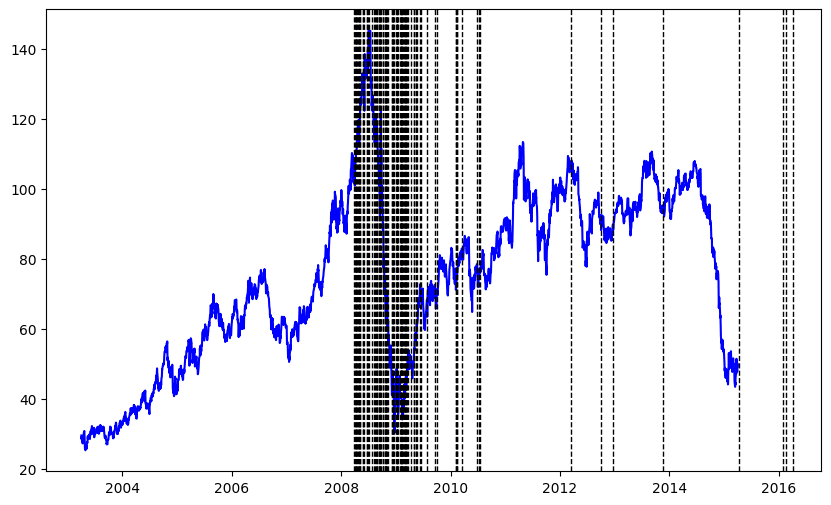

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(sample_date[:, 0], sample_date[:, 1], label='Sample', color='blue')
for t_c in tc_date:
    plt.axvline(x=t_c, color='black', linestyle='--', linewidth=1, label=f't_c = {t_c:.1f}')